# Graph Generation

In [91]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
stepAnalytics = pd.read_csv("stepAnalytics.csv")
stepAnalytics

,signalsNamesOrdered,maxSignals,minSignals,meanSignals,standardDeviationSignals,varianceSignals,kurtosisSignals,skewnessSignals,firstMomentSignals,secondMomentSignals,thirdMomentSignals,fourthMomentSignals
0,compassSystem,1.806514,0.000000,0.987589,0.220810,0.048757,10.667718,-1.063682,0,0.048637,-0.011409,0.025235
1,compassFilter,1.570769,0.000000,0.978267,0.198351,0.039343,14.564642,-2.440525,0,0.039246,-0.018975,0.022433
2,fullSystem,1.594510,0.489326,1.007696,0.136793,0.018712,8.735727,0.167804,0,0.018666,0.000428,0.003044
3,gyroFilter,1.000000,-0.028418,0.029429,0.122868,0.015096,50.119324,6.780436,0,0.015059,0.012530,0.011366
4,gyroSystem,2.003874,1.000000,1.487665,0.285500,0.081510,1.902507,0.171984,0,0.081309,0.003987,0.012578
5,input,1.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,0,0.000000,0.000000,0.000000


In [17]:
rampAnalytics = pd.read_csv("rampAnalytics.csv")
rampAnalytics

,signalsNamesOrdered,maxSignals,minSignals,meanSignals,standardDeviationSignals,varianceSignals,kurtosisSignals,skewnessSignals,firstMomentSignals,secondMomentSignals,thirdMomentSignals,fourthMomentSignals
0,compassSystem,39.947062,0.000000,19.794748,11.680382,136.431315,1.801479,-0.001074,0,136.093614,-1.705519,33366.041145
1,compassFilter,39.569821,0.000000,19.424805,11.667923,136.140418,1.796811,0.002497,0,135.803437,3.952208,33137.816642
2,fullSystem,39.936529,0.000000,19.804577,11.679514,136.411048,1.800337,-0.000533,0,136.073397,-0.845251,33334.977018
3,gyroFilter,0.423914,0.000000,0.379771,0.044157,0.001950,52.931069,-6.695921,0,0.001945,-0.000574,0.000200
4,gyroSystem,40.976671,0.000000,20.340501,11.956389,142.955237,1.801300,0.004443,0,142.601387,7.565722,36629.708907
5,input,40.000000,0.000000,19.851624,11.674118,136.285037,1.798909,0.000806,0,135.947698,1.277456,33247.028376
6,error,0.149340,-0.293334,-0.047047,0.056416,0.003183,8.649317,-0.880773,0,0.003175,-0.000158,0.000087


In [18]:
sineAnalytics = pd.read_csv("sineAnalytics.csv")
sineAnalytics

,signalsNamesOrdered,maxSignals,minSignals,meanSignals,standardDeviationSignals,varianceSignals,kurtosisSignals,skewnessSignals,firstMomentSignals,secondMomentSignals,thirdMomentSignals,fourthMomentSignals
0,compassSystem,1.499320,-1.249857,0.044083,0.845234,0.714420,1.546166,-0.032307,0,0.712651,-0.019436,0.785254
1,compassFilter,1.336873,-1.150521,0.034345,0.784596,0.615591,1.554384,-0.031277,0,0.614067,-0.015050,0.586125
2,fullSystem,1.288865,-1.209016,0.051662,0.811415,0.658394,1.520098,-0.052023,0,0.656764,-0.027689,0.655678
3,gyroFilter,0.376583,-0.369149,0.017317,0.245752,0.060394,1.540526,-0.082296,0,0.060245,-0.001217,0.005591
4,gyroSystem,1.974163,-0.875123,0.531165,0.759772,0.577254,1.897294,0.009990,0,0.575825,0.004365,0.629095
5,input,0.999994,-0.999990,0.042287,0.708043,0.501324,1.511849,-0.091802,0,0.500084,-0.032465,0.378089
6,error,0.426890,-0.288292,0.009375,0.149419,0.022326,2.210462,0.194536,0,0.022271,0.000647,0.001096


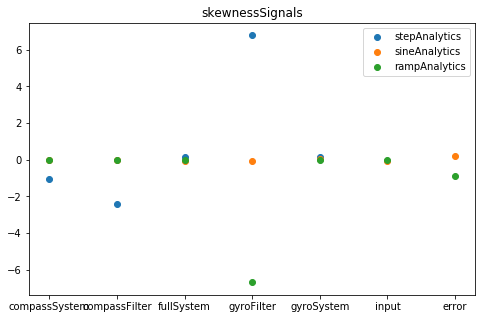

In [19]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(stepAnalytics.signalsNamesOrdered, stepAnalytics.skewnessSignals, 'o', label="stepAnalytics")
ax.plot(sineAnalytics.signalsNamesOrdered, sineAnalytics.skewnessSignals, 'o', label="sineAnalytics")
ax.plot(rampAnalytics.signalsNamesOrdered, rampAnalytics.skewnessSignals, 'o', label="rampAnalytics")
ax.set_title("skewnessSignals")
ax.legend()

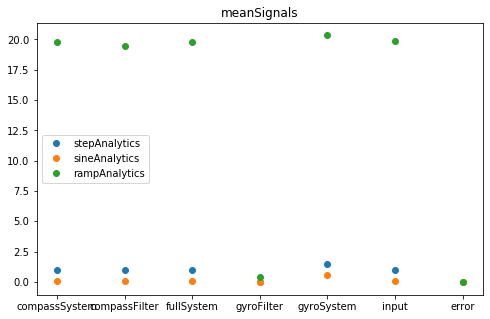

In [20]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(stepAnalytics.signalsNamesOrdered, stepAnalytics.meanSignals, 'o', label="stepAnalytics")
ax.plot(sineAnalytics.signalsNamesOrdered, sineAnalytics.meanSignals, 'o', label="sineAnalytics")
ax.plot(rampAnalytics.signalsNamesOrdered, rampAnalytics.meanSignals, 'o', label="rampAnalytics")
ax.set_title("meanSignals")
ax.legend()

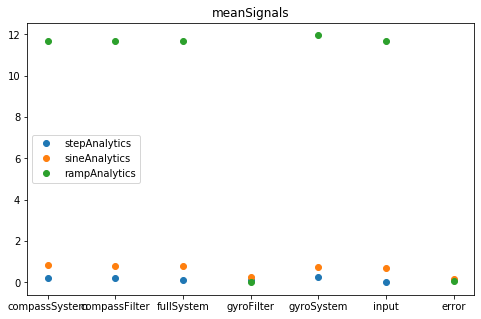

In [21]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(stepAnalytics.signalsNamesOrdered, stepAnalytics.standardDeviationSignals, 'o', label="stepAnalytics")
ax.plot(sineAnalytics.signalsNamesOrdered, sineAnalytics.standardDeviationSignals, 'o', label="sineAnalytics")
ax.plot(rampAnalytics.signalsNamesOrdered, rampAnalytics.standardDeviationSignals, 'o', label="rampAnalytics")
ax.set_title("meanSignals")
ax.legend()

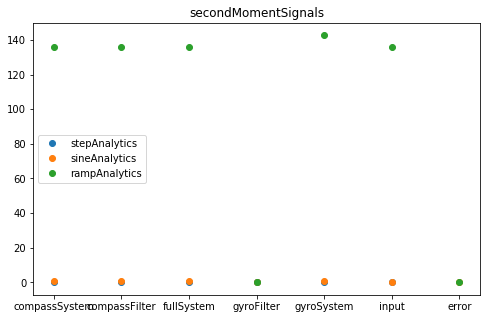

In [22]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(stepAnalytics.signalsNamesOrdered, stepAnalytics.secondMomentSignals, 'o', label="stepAnalytics")
ax.plot(sineAnalytics.signalsNamesOrdered, sineAnalytics.secondMomentSignals, 'o', label="sineAnalytics")
ax.plot(rampAnalytics.signalsNamesOrdered, rampAnalytics.secondMomentSignals, 'o', label="rampAnalytics")
ax.set_title("secondMomentSignals")
ax.legend()

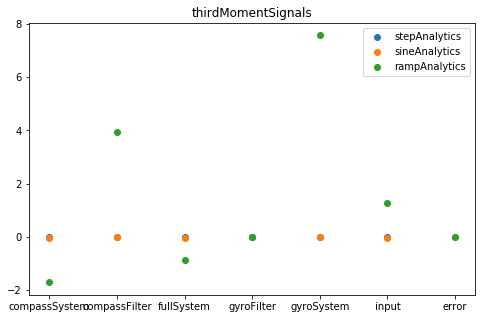

In [23]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(stepAnalytics.signalsNamesOrdered, stepAnalytics.thirdMomentSignals, 'o', label="stepAnalytics")
ax.plot(sineAnalytics.signalsNamesOrdered, sineAnalytics.thirdMomentSignals, 'o', label="sineAnalytics")
ax.plot(rampAnalytics.signalsNamesOrdered, rampAnalytics.thirdMomentSignals, 'o', label="rampAnalytics")
ax.set_title("thirdMomentSignals")
ax.legend()

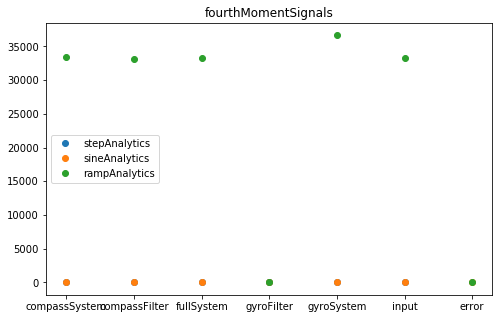

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(stepAnalytics.signalsNamesOrdered, stepAnalytics.fourthMomentSignals, 'o', label="stepAnalytics")
ax.plot(sineAnalytics.signalsNamesOrdered, sineAnalytics.fourthMomentSignals, 'o', label="sineAnalytics")
ax.plot(rampAnalytics.signalsNamesOrdered, rampAnalytics.fourthMomentSignals, 'o', label="rampAnalytics")
ax.set_title("fourthMomentSignals")
ax.legend()

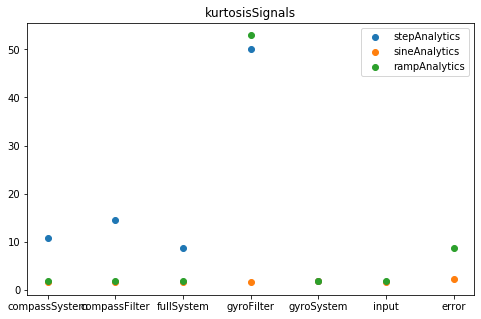

In [25]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(stepAnalytics.signalsNamesOrdered, stepAnalytics.kurtosisSignals, 'o', label="stepAnalytics")
ax.plot(sineAnalytics.signalsNamesOrdered, sineAnalytics.kurtosisSignals, 'o', label="sineAnalytics")
ax.plot(rampAnalytics.signalsNamesOrdered, rampAnalytics.kurtosisSignals, 'o', label="rampAnalytics")
ax.set_title("kurtosisSignals")
ax.legend()

Note that if we want to model how the system error changes per 

In [148]:
signal_types = ["ramp", "step", "sine"]
full_modelling_DataFrame = pd.DataFrame([])
for i in signal_types:
    for j in os.listdir('cutoffVariations'):
        if j.startswith(i) and j.endswith("Analytics.csv"):
            iteration_cutoff_frequency = j.replace(i, "").replace("Analytics.csv", "").replace("_", ".")
            iteration_read_data = pd.read_csv("./cutoffVariations/" + j)
            iteration_read_data.loc[:, 'cutoffFrequency'] = np.array([iteration_cutoff_frequency] * len(iteration_read_data))
            iteration_read_data.loc[:, 'signalType'] = np.array([i] * len(iteration_read_data))
            full_modelling_DataFrame = full_modelling_DataFrame.append(iteration_read_data, ignore_index=True)
full_modelling_DataFrame = full_modelling_DataFrame

In [150]:
full_modelling_DataFrame

,signalsNamesOrdered,maxSignals,minSignals,meanSignals,standardDeviationSignals,varianceSignals,kurtosisSignals,skewnessSignals,firstMomentSignals,secondMomentSignals,thirdMomentSignals,fourthMomentSignals,cutoffFrequency,signalType
0,compassSystem,39.947062,0.000000,19.794748,11.680382,1.364313e+02,1.801479,-0.001074,0,1.360936e+02,-1.705519e+00,3.336604e+04,0.12649,ramp
1,compassFilter,32.091048,0.000000,13.504995,9.995303,9.990609e+01,1.749048,0.239062,0,9.965879e+01,2.378396e+02,1.737133e+04,0.12649,ramp
2,fullSystem,40.126723,0.000000,19.961436,11.711481,1.371588e+02,1.800481,-0.000418,0,1.368193e+02,-6.696151e-01,3.370413e+04,0.12649,ramp
3,gyroFilter,8.084963,0.000000,6.456441,2.067357,4.273967e+00,4.397910,-1.536587,0,4.263388e+00,-1.352663e+01,7.993851e+01,0.12649,ramp
4,gyroSystem,40.976671,0.000000,20.340501,11.956389,1.429552e+02,1.801300,0.004443,0,1.426014e+02,7.565722e+00,3.662971e+04,0.12649,ramp
5,input,40.000000,0.000000,19.851624,11.674118,1.362850e+02,1.798909,0.000806,0,1.359477e+02,1.277456e+00,3.324703e+04,0.12649,ramp
6,error,0.219177,0.000000,0.109812,0.050364,2.536527e-03,2.163298,-0.008135,0,2.530249e-03,-1.035427e-06,1.384978e-05,0.12649,ramp
7,compassSystem,39.947062,0.000000,19.794748,11.680382,1.364313e+02,1.801479,-0.001074,0,1.360936e+02,-1.705519e+00,3.336604e+04,0.15999,ramp
8,compassFilter,33.706573,0.000000,14.572057,10.482884,1.098909e+02,1.734813,0.190472,0,1.096188e+02,2.186049e+02,2.084602e+04,0.15999,ramp
9,fullSystem,40.084214,0.000000,19.933131,11.701080,1.369153e+02,1.799963,0.000016,0,1.365764e+02,2.592547e-02,3.357491e+04,0.15999,ramp


In [171]:
a = full_modelling_DataFrame.loc[(full_modelling_DataFrame.signalsNamesOrdered == "error")
                                 & (full_modelling_DataFrame.signalType == "step"),
                                 :]
a

,signalsNamesOrdered,maxSignals,minSignals,meanSignals,standardDeviationSignals,varianceSignals,kurtosisSignals,skewnessSignals,firstMomentSignals,secondMomentSignals,thirdMomentSignals,fourthMomentSignals,cutoffFrequency,signalType
356,error,0.271840,-0.022940,0.154466,0.060346,0.003642,2.966307,-0.474975,0,0.003633,-0.000104,0.000039,0.12649,step
363,error,0.231244,-0.035124,0.128371,0.051082,0.002609,3.215373,-0.540788,0,0.002603,-0.000072,0.000022,0.15999,step
370,error,0.318006,-0.013141,0.183252,0.072799,0.005300,2.733194,-0.429967,0,0.005287,-0.000165,0.000076,0.1,step
377,error,0.195981,-0.050204,0.105392,0.044853,0.002012,3.471270,-0.657648,0,0.002007,-0.000059,0.000014,0.20236,step
384,error,0.165425,-0.068761,0.085630,0.041362,0.001711,3.720805,-0.806012,0,0.001707,-0.000057,0.000011,0.25595,step
391,error,0.145166,-0.091429,0.068962,0.040403,0.001632,4.057995,-0.894911,0,0.001628,-0.000059,0.000011,0.32375,step
398,error,0.166080,-0.118859,0.055129,0.041968,0.001761,4.717964,-0.833214,0,0.001757,-0.000061,0.000015,0.40949,step
405,error,0.195778,-0.151657,0.043809,0.046176,0.002132,5.758888,-0.627589,0,0.002127,-0.000062,0.000026,0.51795,step
412,error,0.234178,-0.190281,0.034647,0.053124,0.002822,6.880222,-0.371173,0,0.002815,-0.000055,0.000055,0.65513,step
419,error,0.282010,-0.234879,0.027292,0.062803,0.003944,7.755027,-0.148531,0,0.003934,-0.000037,0.000120,0.82864,step


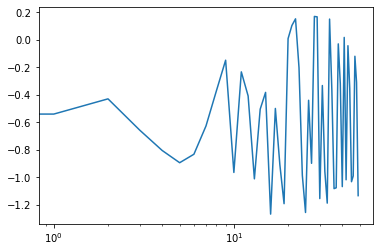

In [173]:
plt.plot(a.cutoffFrequency, a.skewnessSignals)
plt.xscale('log')